In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats
## Post Hoc
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
ho_desc = 'No statistical significance exists. The null hypothesis was not rejected.'
ha_desc = 'A statistical significance exists. The null hypothesis is rejected and the alternative is supported that..'

In [3]:
# Load the dataframe from the csv file
df = pd.read_csv('insurance - insurance.csv')

In [4]:
# Display the first (5) rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
smoker_df = df.loc[df.smoker =='yes', ['smoker','charges']].copy()
smoker_df.head()

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768


In [6]:
len(smoker_df)


274

In [7]:
nonsmoker_df = df.loc[df.smoker =='no', ['smoker','charges']].copy()
nonsmoker_df.head()

,smoker,charges
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
5,no,3756.62160


In [8]:
len(nonsmoker_df)

1064

In [10]:
q1_plot_df = pd.concat([smoker_df, nonsmoker_df], axis=0).copy()

# State Null and Alternative Hypothesis

- H0 Null Hypothesis
No statistical significance exists.
No significant difference in insurance costs exists between smokers and non-smokers.
- HA Alternate Hypothesis
A statistical significance exists. T
A significant difference in insurance costs exists between smokers and non-smokers.

- Data type: numeric 
- Number of groups - 2 (smoker and nonsmoker 
- correct test- 2 sample t test 

In [11]:
smoker_group = smoker_df['charges']
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
smoker_outliers.sum()

0

In [16]:
# number of outliers
nonsmoker_group = nonsmoker_df['charges']
nonsmoker_outliers = np.abs(stats.zscore(nonsmoker_group)) > 3
nonsmoker_outliers.sum()

24

In [13]:
len(nonsmoker_group)

1064

In [15]:
# remove outliers
nonsmoker_group = nonsmoker_group.loc[~nonsmoker_outliers]
len(nonsmoker_group)

1040

Assumption Equal Variance 

In [17]:
ho = "All input samples are from populations with equal variances."
ha = "All input samples are not from populations with equal variances."
alpha = .05

In [18]:
# Run the test and display the results
statistic, pvalue = stats.levene(smoker_group, nonsmoker_group)
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(ho)      

The p-value for the test was 1.5593284881803726e-66
It was < the alpha value of 0.05, so
A statistical significance exists. The null hypothesis is rejected and the alternative is supported that..
All input samples are not from populations with equal variances.


Did not pass equal variance test 
- cannot use 2 sample t test 
- needto use welch's t test 

In [19]:
ho = 'No significant difference in insurance costs exists between smokers and non-smokers.'
ha = 'A significant difference in insurance costs exists between smokers and non-smokers.'
alpha = .05

In [20]:
# Run the test and display the results
statistic, pvalue = stats.ttest_ind(smoker_group, nonsmoker_group, equal_var=False) #double check equal_var=True/False
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(ho)

The p-value for the test was 5.88946444671698e-103
It was < the alpha value of 0.05, so
A statistical significance exists. The null hypothesis is rejected and the alternative is supported that..
A significant difference in insurance costs exists between smokers and non-smokers.


In [21]:
# supporting visualization 
q1_plot_df

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768
...,...,...
1332,no,11411.6850
1333,no,10600.5483
1334,no,2205.9808
1335,no,1629.8335


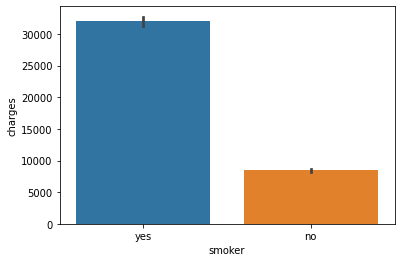

In [22]:
sns.barplot(data=q1_plot_df, x='smoker', y='charges', ci=68.2);

In [23]:
# Display the first (5) rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
men_df = df.loc[df.sex =='male', ['sex','smoker']].copy()
men_df.head()

,sex,smoker
1,male,no
2,male,no
3,male,no
4,male,no
8,male,no


In [25]:
len(men_df)

676

In [26]:
women_df = df.loc[df.sex =='female', ['sex','smoker']].copy()
women_df.head()

,sex,smoker
0,female,yes
5,female,no
6,female,no
7,female,no
9,female,no


In [27]:
len(women_df)

662

In [28]:
q2_plot_df = pd.concat([men_df, women_df], axis=0).copy()

# State Null and Alternative Hypothesis Question 2

- H0 Null Hypothesis
No statistical significance exists.
No significant difference exists in the likelihood of men than women to be smokers.
- HA Alternate Hypothesis
A statistical significance exists. T
A significant difference exists in the likelihood of men than women to be smokers.

- Data type: Categorical 
- Number of groups - 2 (smoker and nonsmoker 
- Chi-Square 
- 2 catergories men and women 
- outcomes are independent 

In [29]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [30]:
ho = 'No significant difference exists in the likelihood of men than women to be smokers.'
ha = 'A significant difference exists in the likelihood of men than women to be smokers.'
alpha = .05

In [31]:
# Run the test and display the results
chi2, pvalue, deg_free, expected_vals = stats.chi2_contingency(table)
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(ho)

The p-value for the test was 0.006548143503580696
It was < the alpha value of 0.05, so
A statistical significance exists. The null hypothesis is rejected and the alternative is supported that..
A significant difference exists in the likelihood of men than women to be smokers.


In [32]:
# supporting visual
q2_plot_df

,sex,smoker
1,male,no
2,male,no
3,male,no
4,male,no
8,male,no
...,...,...
1332,female,no
1334,female,no
1335,female,no
1336,female,no


In [33]:
grouped = q2_plot_df.groupby(['sex'], sort=False)
smoker_counts = grouped['smoker'].value_counts(normalize=True, sort=False)
smoker_data = [{'smoker': smoker, 'sex': sex, 'percentage': percentage*100} for 
    (smoker, sex), percentage in dict(smoker_counts).items()]
smoker_df = pd.DataFrame(smoker_data)

In [34]:
smoker_df


,smoker,sex,percentage
0,male,no,76.479290
1,male,yes,23.520710
2,female,no,82.628399
3,female,yes,17.371601


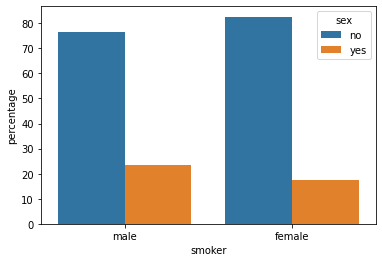

In [35]:
p = sns.barplot(x="smoker", y="percentage", hue="sex", data=smoker_df)

# State Null and Alternative Hypothesis Question 3

- H0 Null Hypothesis
No statistical significance exists.
No significant difference in charges exists between regions.
- HA Alternate Hypothesis
A statistical significance exists. T
A significant difference in charges exists between regions.

- Data type: numeric 
- Number of groups - more than 2 
- ANOVA and/or Tukey 
- 2 catergories men and women 
- nonparametric 

In [36]:
groups = {}
for region in df['region'].unique():
    temp_df = df.loc[df['region'] == region, 'charges']
    groups[region] = temp_df
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [37]:
groups['southwest']

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64

In [38]:
# satisfiy outlier assumption
for region, data in groups.items():
    # Calculate the number of outliers
    outliers = np.abs(stats.zscore(data)) > 3
    print(f"{outliers.sum()} outliers were removed from the {region} group.")
    # Remove the outliers
    groups[region] = data.loc[~outliers]

8 outliers were removed from the southwest group.
2 outliers were removed from the southeast group.
7 outliers were removed from the northwest group.
4 outliers were removed from the northeast group.


In [39]:
# Loop through the groups and obtain
# group count and the pvalue of the Normal Test
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data),
                       'p':p}

In [40]:
# Display a dataframe created from the norm_results dictonary and transpose it 
pd.DataFrame(norm_results).T

,n,p
southwest,317.0,7.728611e-22
southeast,362.0,1.936990e-13
northwest,318.0,2.940543e-19
northeast,320.0,3.557877e-17


In [41]:
# Create and display a dataframe created from the norm_results dictonary and transpose it 
norm_results_df = pd.DataFrame(norm_results).T
# Add a column to indicate if the group pvalue was significant or not
norm_results_df['sig?'] = norm_results_df['p'] < .05

In [42]:
# Display the dataframe
norm_results_df

,n,p,sig?
southwest,317.0,7.728611e-22,True
southeast,362.0,1.936990e-13,True
northwest,318.0,2.940543e-19,True
northeast,320.0,3.557877e-17,True


- large enough group to disregard assumption of normality 
- groups do not come from normal distributions

In [43]:
ho = "All input samples are from populations with equal variances."
ha = "All input samples are not from populations with equal variances."
alpha = .05

In [44]:
# Run the test and display the results
statistic, pvalue = stats.levene(*groups.values())
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(ho)    

The p-value for the test was 3.2035503711783993e-06
It was < the alpha value of 0.05, so
A statistical significance exists. The null hypothesis is rejected and the alternative is supported that..
All input samples are not from populations with equal variances.


In [45]:
ho = 'No significant difference in charges exists between regions.'
ha = 'A significant difference in charges exists between regions.'
alpha = .05

In [46]:
# Run the test and display the results
statistic, pvalue = stats.kruskal(*groups.values())
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(ho)

The p-value for the test was 0.07468847911322242
It was > the alpha value of 0.05, so
No statistical significance exists. The null hypothesis was not rejected.
No significant difference in charges exists between regions.


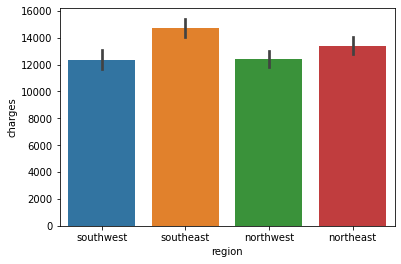

In [47]:
sns.barplot(data=df, x='region', y='charges', ci=68);